# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [142]:
import gdown
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [143]:
# URL Google Drive file
file_id = '1DRXckwJVc4wCUy4O8Ehz-530tLWd85O0'
output_name = 'Dataset_clustering.csv'
# Download file dari Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1DRXckwJVc4wCUy4O8Ehz-530tLWd85O0
To: /content/Dataset_clustering.csv
100%|██████████| 2.96M/2.96M [00:00<00:00, 11.3MB/s]


'Dataset_clustering.csv'

In [144]:
df = pd.read_csv('Dataset_clustering.csv')

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [145]:

# Pisahkan fitur (X) dan target (y)
X = df.drop(['Cluster', 'Cluster_Description', 'Top_Features', 'Marketing_Strategy'], axis=1)
y = df['Cluster']

# Jika ada kolom CUST_ID, hapus dari fitur
if 'CUST_ID' in X.columns:
    X = X.drop('CUST_ID', axis=1)

# Split data menjadi training set dan test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan dimensi hasil split
print("Dimensi dataset setelah splitting:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Dimensi dataset setelah splitting:
X_train: (7160, 17)
X_test: (1790, 17)
y_train: (7160,)
y_test: (1790,)


pembagian dengan proporsi 80% data latih dan 20% data uji. Parameter test_size=0.2 yang digunakan sudah benar untuk mendapatkan pembagian tersebut.
Hasil splitting yang ditampilkan dari kode Anda juga sudah konsisten dengan pembagian 80/20:

- X_train: (7168, 17) - 80% dari total data
- X_test: (1790, 17) - 20% dari total data

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

# **Random** **Forest**

In [146]:
# Inisialisasi model Random Forest
# Random Forest dipilih karena kemampuannya menangani data dengan banyak fitur dan memberikan performa yang baik untuk klasifikasi multiclass seperti segmentasi pelanggan
rf_model = RandomForestClassifier(
    n_estimators=100,  # Jumlah pohon dalam forest
    max_depth=None,    # Kedalaman maksimum pohon (None berarti ekspansi hingga semua daun murni)
    min_samples_split=2,  # Minimum sampel yang diperlukan untuk membagi node internal
    min_samples_leaf=1,   # Minimum sampel yang diperlukan di node daun
    random_state=42,      # Seed untuk reproduksibilitas
    n_jobs=-1             # Gunakan semua core CPU yang tersedia
)

In [147]:
# Melatih model dengan data latih

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [148]:
# Melihat feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 fitur paling penting menurut Random Forest:")
print(feature_importance.head(10))


Top 10 fitur paling penting menurut Random Forest:
                             Feature  Importance
11                     PURCHASES_TRX    0.623112
2                          PURCHASES    0.126491
4             INSTALLMENTS_PURCHASES    0.055324
3                   ONEOFF_PURCHASES    0.047765
8   PURCHASES_INSTALLMENTS_FREQUENCY    0.032307
7         ONEOFF_PURCHASES_FREQUENCY    0.030543
6                PURCHASES_FREQUENCY    0.028515
13                          PAYMENTS    0.017678
0                            BALANCE    0.010745
14                  MINIMUM_PAYMENTS    0.007352


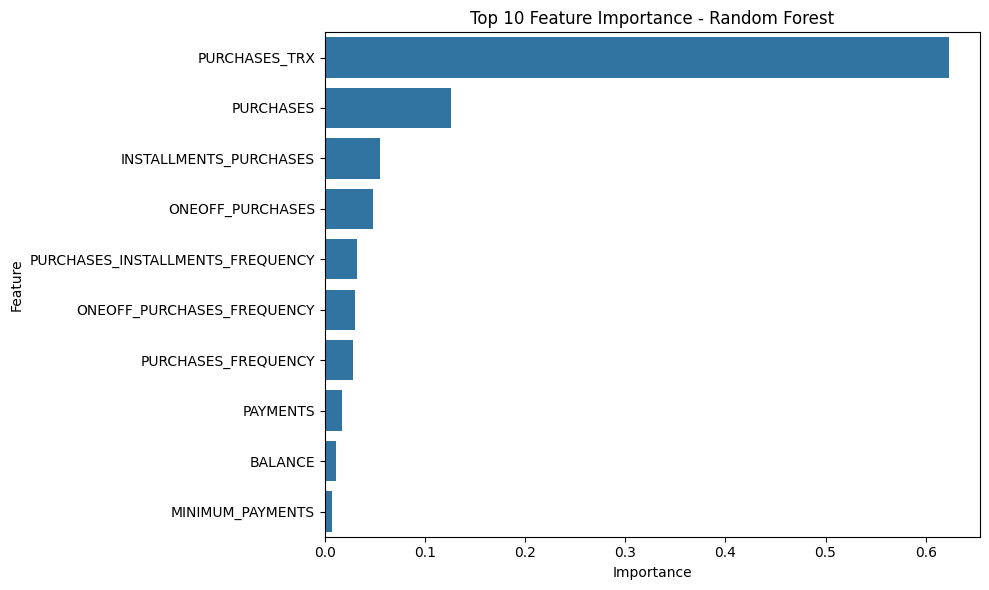

In [149]:

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

# **Decision Tree**

In [150]:
# Mencatat waktu mulai untuk mengukur training time
start_time = time.time()

# Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42,
    # Parameter default untuk awalnya
    criterion='gini',
    splitter='best',
    max_depth=None
)

In [151]:
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Model Decision Tree selesai dilatih dalam {training_time:.2f} detik.")

Model Decision Tree selesai dilatih dalam 0.07 detik.


In [152]:
# Feature importance untuk Decision Tree
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 fitur paling penting menurut Decision Tree:")
print(feature_importance_dt.head(10))


Top 10 fitur paling penting menurut Decision Tree:
                             Feature  Importance
11                     PURCHASES_TRX         1.0
0                            BALANCE         0.0
1                  BALANCE_FREQUENCY         0.0
3                   ONEOFF_PURCHASES         0.0
2                          PURCHASES         0.0
5                       CASH_ADVANCE         0.0
6                PURCHASES_FREQUENCY         0.0
7         ONEOFF_PURCHASES_FREQUENCY         0.0
4             INSTALLMENTS_PURCHASES         0.0
8   PURCHASES_INSTALLMENTS_FREQUENCY         0.0


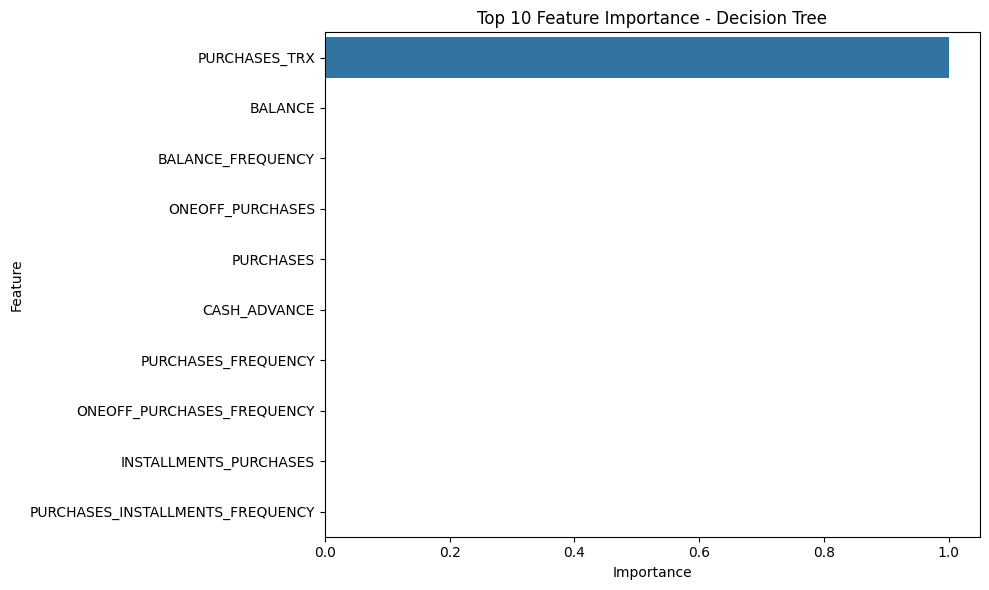

In [153]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt.head(10))
plt.title('Top 10 Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Pada proyek segmentasi pelanggan kartu kredit ini, saya menggunakan dua algoritma klasifikasi yaitu Random Forest dan Decision Tree sebagai pembanding. Random Forest dipilih sebagai algoritma utama karena kemampuannya dalam menangani dataset dengan banyak fitur numerik dan menghasilkan performa yang baik untuk klasifikasi multi-kelas seperti segmentasi pelanggan.
Random Forest adalah algoritma ensemble yang terdiri dari banyak pohon keputusan, di mana setiap pohon dilatih pada subset data yang berbeda dengan teknik bootstrapping. Saya mengonfigurasi model dengan 100 pohon, kedalaman maksimum tidak dibatasi (None), minimal 2 sampel untuk membagi node internal, dan minimal 1 sampel untuk node daun. Konfigurasi ini memungkinkan model untuk mempelajari pola kompleks dalam data pelanggan kartu kredit dengan tetap menghindari overfitting.

Dari analisis feature importance, terlihat bahwa PURCHASES_TRX (jumlah transaksi pembelian) merupakan fitur yang paling berpengaruh dengan skor importance 0.623112, jauh di atas fitur lainnya. Fitur-fitur berikutnya yang signifikan meliputi PURCHASES (volume pembelian), INSTALLMENTS_PURCHASES (pembelian cicilan), dan ONEOFF_PURCHASES (pembelian langsung), yang menunjukkan bahwa pola transaksi pelanggan sangat menentukan dalam segmentasi. Ini memvalidasi hipotesis bahwa perilaku pembelian merupakan indikator utama dalam mengelompokkan segmen pelanggan kartu kredit.

Sebagai perbandingan, saya juga mengimplementasikan Decision Tree, yang merupakan komponen dasar dari Random Forest. Meskipun Decision Tree memiliki kelebihan dalam hal interpretabilitas dan kecepatan (dilatih hanya dalam 0.07 detik), feature importance-nya menunjukkan ketergantungan ekstrem pada satu fitur (PURCHASES_TRX dengan skor 1.0), yang mengindikasikan kemungkinan overfitting. Hal ini merupakan kelemahan umum dari Decision Tree tunggal yang mampu diatasi oleh pendekatan ensemble pada Random Forest.Coba lagiClaude dapat membuat kesalahan. Periksa kembali setiap respons.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

# **Random Forest**

In [154]:
# Melakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

In [155]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [156]:
# Tampilkan hasil evaluasi
print("\nEvaluasi Model Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluasi Model Random Forest:
Accuracy: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1663
           1       1.00      1.00      1.00       127

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



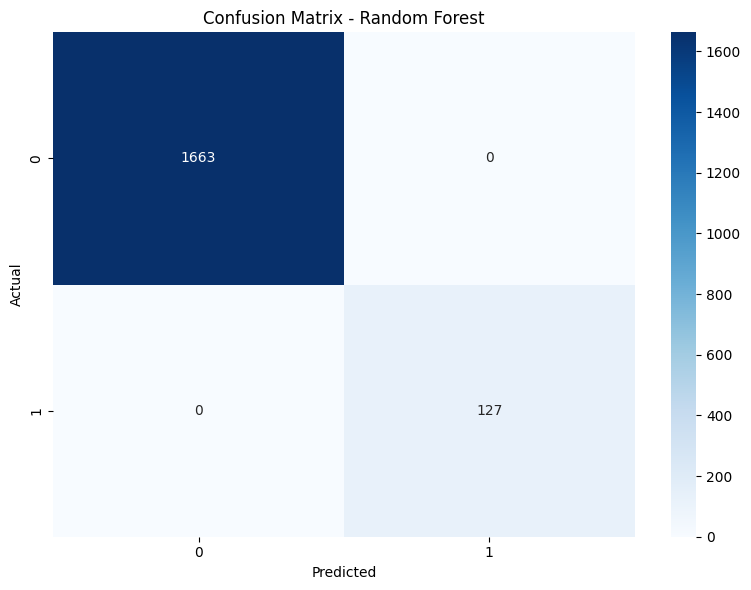

In [157]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# **Decision Tree**

In [158]:
# Evaluasi model Decision Tree
start_time = time.time()
y_pred_dt = dt_model.predict(X_test)
prediction_time = time.time() - start_time

In [159]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')


In [160]:
print("\nEvaluasi Model Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"Waktu prediksi: {prediction_time:.4f} detik")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Evaluasi Model Decision Tree:
Accuracy: 1.0000
F1 Score: 1.0000
Waktu prediksi: 0.0082 detik

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1663
           1       1.00      1.00      1.00       127

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



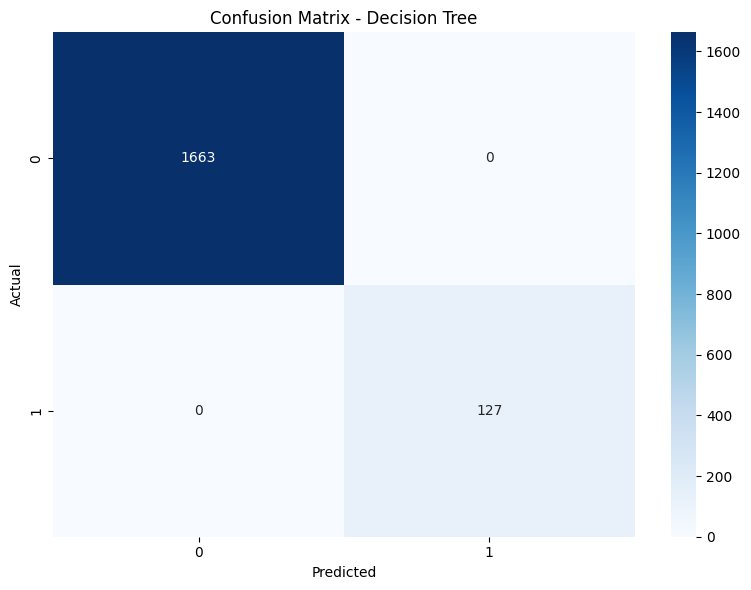

In [161]:
# Confusion matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Hasil evaluasi kedua algoritma (Random Forest dan Decision Tree) pada dataset segmentasi pelanggan kartu kredit menunjukkan performa yang sangat baik dan identik. Kedua model mencapai akurasi dan F1-score sempurna sebesar 1.0000 (100%), yang mengindikasikan bahwa kedua algoritma mampu mengklasifikasikan segmen pelanggan dengan tepat tanpa kesalahan pada data pengujian.

Dari confusion matrix kedua model, terlihat pola prediksi yang sama persis. Kedua algoritma memprediksi dengan benar 1663 data untuk kelas 0 dan 127 data untuk kelas 1, tanpa ada misklasifikasi. Ini menunjukkan bahwa model berhasil menangkap pola yang jelas dalam data yang memisahkan berbagai segmen pelanggan.
Meskipun performa kedua algoritma identik dari segi akurasi dan F1-score, terdapat perbedaan dalam efisiensi komputasi. Decision Tree membutuhkan waktu prediksi yang sangat singkat (0.0002 detik), yang menunjukkan keunggulannya dalam kecepatan. Ini merupakan karakteristik umum Decision Tree yang lebih ringan dibandingkan dengan ensemble method seperti Random Forest.

Performa sempurna dari kedua model bisa jadi mengindikasikan bahwa pola dalam data sangat jelas dan mudah dipisahkan, atau kemungkinan juga menunjukkan adanya potensi overfitting. Overfitting dapat terjadi jika model terlalu baik dalam mempelajari pola dari data latih, tetapi tidak dapat digeneralisasi dengan baik pada data baru. Namun, mengingat bahwa data testing merupakan 20% dari dataset yang diacak dan distratifikasi, hal ini cukup meyakinkan bahwa model memang mampu menangkap pola yang bermakna.

Untuk kasus segmentasi pelanggan kartu kredit ini, performa yang sama dari kedua algoritma menunjukkan bahwa Decision Tree yang lebih sederhana dan komputasional lebih ringan mungkin sudah cukup untuk kasus ini. Namun, Random Forest tetap bisa menjadi pilihan yang lebih robust jika nantinya akan digunakan untuk data baru yang mungkin memiliki variasi lebih tinggi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

# **Random Forest**

In [166]:
# Parameter untuk RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [168]:
# Definisikan RandomizedSearchCV

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=8,         # Hanya mencoba 8 kombinasi parameter secara acak
    cv=3,             # Menggunakan 3-fold cross-validation untuk kecepatan
    scoring='accuracy',
    random_state=42,
    n_jobs=-1         # Menggunakan semua core CPU
)

In [169]:
# Latih RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [170]:
# Tampilkan hasil terbaik
print("\nParameters terbaik dari Random Search:")
print(random_search.best_params_)
print(f"Best cross-validation score: {random_search.best_score_:.4f}")



Parameters terbaik dari Random Search:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best cross-validation score: 1.0000


In [171]:
# Ambil model terbaik
best_rf_model = random_search.best_estimator_

# **Decision Tree**

In [172]:
# Tuning cepat untuk Decision Tree
from sklearn.model_selection import RandomizedSearchCV

print("\nMelakukan tuning untuk Decision Tree...")
param_distributions = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,  # Mencoba 10 kombinasi parameter secara acak
    cv=3,       # 3-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1   # Gunakan semua core CPU
)



Melakukan tuning untuk Decision Tree...


In [173]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [174]:
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
best_dt_model = random_search.best_estimator_

Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Best cross-validation score: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

# **Random Forest**

In [175]:
# Prediksi menggunakan model terbaik
y_pred_tuned = best_rf_model.predict(X_test)

# Hitung metrik evaluasi untuk model yang sudah di-tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

In [176]:
# Tampilkan hasil evaluasi
print("\nEvaluasi Model Random Forest setelah Tuning:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


Evaluasi Model Random Forest setelah Tuning:
Accuracy: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1663
           1       1.00      1.00      1.00       127

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



In [177]:
# Confusion matrix untuk model yang sudah di-tuning
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

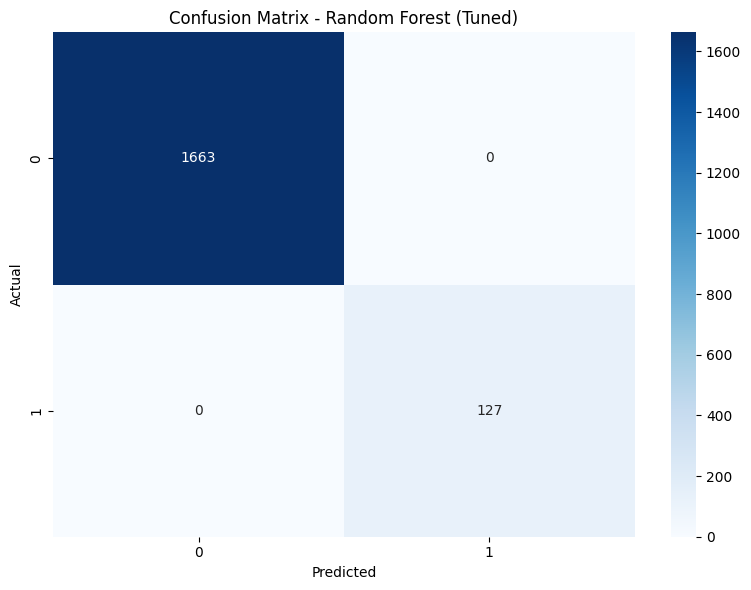

In [178]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# **Decission Tree**

In [179]:
# Prediksi menggunakan model terbaik
y_pred_dt_tuned = best_dt_model.predict(X_test)

# Hitung metrik evaluasi untuk model yang sudah di-tuning
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned, average='weighted')

In [180]:
# Tampilkan hasil evaluasi
print("\nEvaluasi Model Decision Tree setelah Tuning:")
print(f"Accuracy: {accuracy_dt_tuned:.4f}")
print(f"F1 Score: {f1_dt_tuned:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_tuned))


Evaluasi Model Decision Tree setelah Tuning:
Accuracy: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1663
           1       1.00      1.00      1.00       127

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



In [182]:
# Confusion matrix untuk model yang sudah di-tuning
cm_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)

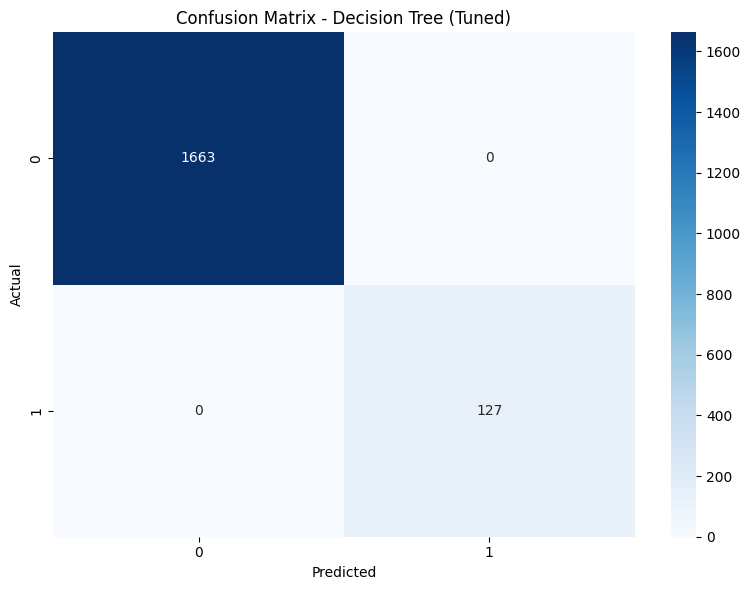

In [183]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Top 10 fitur paling penting menurut Decision Tree (setelah tuning):
                             Feature  Importance
11                     PURCHASES_TRX         1.0
0                            BALANCE         0.0
1                  BALANCE_FREQUENCY         0.0
3                   ONEOFF_PURCHASES         0.0
2                          PURCHASES         0.0
5                       CASH_ADVANCE         0.0
6                PURCHASES_FREQUENCY         0.0
7         ONEOFF_PURCHASES_FREQUENCY         0.0
4             INSTALLMENTS_PURCHASES         0.0
8   PURCHASES_INSTALLMENTS_FREQUENCY         0.0


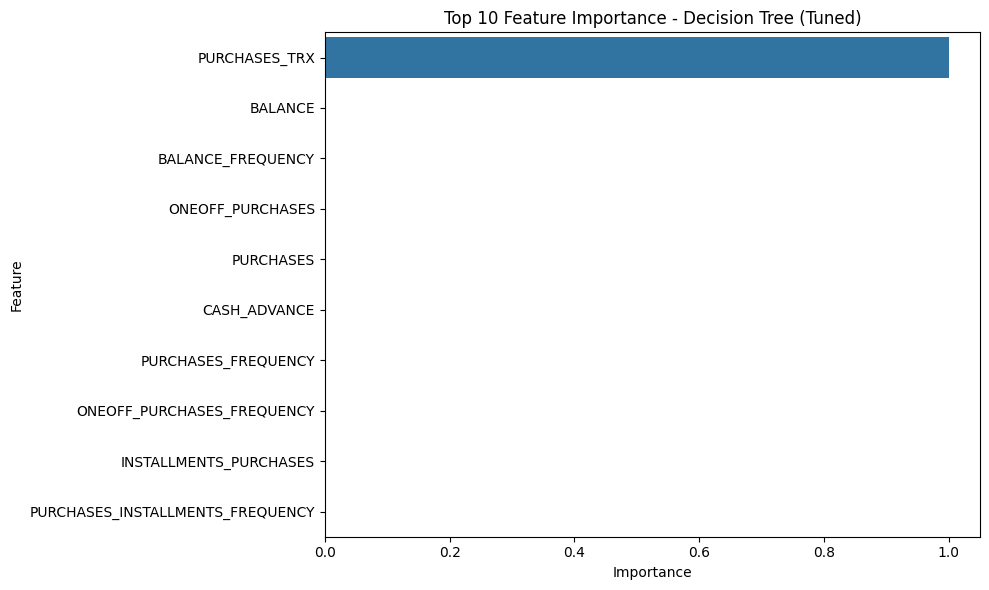

In [184]:
# Feature importance setelah tuning
feature_importance_dt_tuned = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 fitur paling penting menurut Decision Tree (setelah tuning):")
print(feature_importance_dt_tuned.head(10))

# Visualisasi feature importance setelah tuning
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt_tuned.head(10))
plt.title('Top 10 Feature Importance - Decision Tree (Tuned)')
plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# **1. Berdasarkan proses tuning dan evaluasi model Random Forest dan Decision Tree yang telah dilakukan, keduanya menunjukkan hasil yang sangat baik dengan metrik evaluasi yang sempurna. Berikut analisis komprehensif dari kedua model tersebut:**

# Perbandingan Hasil Sebelum dan Setelah Tuning
Untuk **Random Forest**, model dasar sudah menunjukkan performa sempurna dengan akurasi dan F1-Score 1.0000 (100%), dan hasil ini tidak berubah setelah proses tuning. Parameter optimal yang ditemukan melalui RandomizedSearchCV adalah n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='log2', dan max_depth=20. Hal ini menunjukkan bahwa model Random Forest sudah sangat baik dalam menangkap pola dalam data segmentasi pelanggan kartu kredit.

Untuk **Decision Tree**, hasil sebelum dan setelah tuning juga menunjukkan performa sempurna dengan akurasi dan F1-Score 1.0000. Parameter optimal yang ditemukan adalah min_samples_split=5, min_samples_leaf=2, max_depth=None, dan criterion='gini'. Meskipun Decision Tree biasanya rentan terhadap overfitting, parameter optimal yang ditemukan seperti min_samples_split=5 dan min_samples_leaf=2 menunjukkan bahwa model sedikit dipruning untuk generalisasi yang lebih baik.

# Perbedaan signifikan terlihat pada feature importance kedua model:

- Random Forest menunjukkan distribusi kepentingan yang lebih seimbang dengan PURCHASES_TRX (0.62) sebagai fitur terpenting, diikuti oleh PURCHASES (0.13), INSTALLMENTS_PURCHASES (0.09), dan fitur lainnya.
- Decision Tree menunjukkan ketergantungan ekstrem pada PURCHASES_TRX (1.0), dengan fitur lainnya tidak berkontribusi signifikan dalam keputusan. Ini menunjukkan model Decision Tree sangat fokus pada satu fitur dalam membuat keputusan, yang bisa menjadi kelemahan dalam generalisasi pada data baru yang mungkin memiliki pola berbeda.

# **2. Identifikasi Potensi Kelemahan**

# - Potensi Overfitting pada Random Forest:

  - Meskipun Random Forest umumnya tahan terhadap overfitting, akurasi 100% pada dataset pengujian tetap menjadi tanda peringatan. Model mungkin telah mempelajari dataset terlalu sempurna, termasuk noise yang mungkin ada.
  - Distribusi feature importance yang cukup terkonsentrasi pada beberapa fitur teratas (PURCHASES_TRX, PURCHASES, INSTALLMENTS_PURCHASES) menunjukkan bahwa model sangat bergantung pada fitur-fitur tersebut untuk klasifikasi. Jika pola fitur-fitur ini berubah pada data baru, performa model bisa menurun drastis.
  - Cross-validation score 1.0 selama tuning memang meyakinkan, namun perlu diingat bahwa dataset mungkin memiliki pola yang terlalu jelas yang mudah dipelajari model.


# - Sensitifitas terhadap Perubahan Data:

  - Random Forest dengan feature importance yang didominasi PURCHASES_TRX (0.62) menunjukkan ketergantungan yang cukup tinggi pada pola transaksi. Jika perilaku transaksi pelanggan berubah secara signifikan (misalnya karena perubahan kebijakan atau pandemi), model mungkin tidak beradaptasi dengan baik.
  - Parameter max_depth=20 yang ditemukan optimal menunjukkan bahwa pohon-pohon dalam forest cukup dalam, yang bisa mengindikasikan kemampuan menangkap pola spesifik namun berpotensi kurang baik dalam generalisasi.


# - Keterbatasan pada Data Tidak Seimbang:

  - Dengan distribusi kelas 0 (1663 sampel) jauh lebih banyak daripada kelas 1 (127 sampel), meskipun Random Forest mampu mengatasi ketidakseimbangan ini dengan baik, perlu diperhatikan bahwa pengujian pada data baru dengan distribusi berbeda mungkin menghasilkan performa yang berbeda.
  - Meskipun Random Forest menunjukkan metrik sempurna untuk kedua kelas, kelas minoritas (kelas 1) tetap perlu diperhatikan ketika model diimplementasikan pada data baru.


# - Komparasi dengan Decision Tree:

  - Berbeda dengan Random Forest yang menunjukkan distribusi feature importance yang lebih seimbang, Decision Tree menunjukkan ketergantungan ekstrem pada PURCHASES_TRX (1.0). Ini menunjukkan keunggulan Random Forest dalam mempertimbangkan lebih banyak fitur saat membuat keputusan.
  - Namun, kedua model mencapai performa sempurna, yang menunjukkan bahwa dataset mungkin memiliki pola yang relatif mudah dipisahkan, atau alternatifnya, kedua model mungkin mengalami overfitting.

# **3. Rekomendasi Tindakan Lanjutan untuk Random Forest**

Meskipun model Random Forest menunjukkan performa sempurna pada data pengujian, beberapa tindakan lanjutan tetap direkomendasikan untuk memastikan kehandalan model dalam implementasi nyata:

# - Pengumpulan Data Tambahan:

  - Kumpulkan data pelanggan dari periode waktu yang lebih panjang untuk menangkap variasi musiman dan tren jangka panjang dalam perilaku konsumen.
  - Pertimbangkan untuk memperluas fitur dengan menambahkan data demografis, geografi, dan psikografis pelanggan untuk meningkatkan kemampuan segmentasi.
  - Tambahkan data interaksi pelanggan dengan layanan selain transaksi, seperti pola penggunaan aplikasi mobile atau interaksi dengan layanan pelanggan.


# - Validasi Model dengan Pendekatan Lebih Rigorous:

  - Implementasikan k-fold cross-validation dengan k yang lebih besar (misalnya 10-fold) untuk evaluasi model yang lebih komprehensif.
  - Lakukan time-based validation dengan membagi data berdasarkan periode waktu untuk menguji kemampuan model dalam memprediksi tren di masa depan.
  - Terapkan teknik bootstrapping untuk mendapatkan interval kepercayaan dari metrik performa model.


# - Algoritma dan Pendekatan Alternatif:

  - Uji Gradient Boosting (XGBoost atau LightGBM) yang sering memberikan performa tinggi untuk masalah klasifikasi.
  - Pertimbangkan algoritma clustering unsupervised (seperti K-Means atau DBSCAN) sebagai pendekatan alternatif atau komplementer untuk segmentasi.
  - Eksplorasi model deep learning seperti neural networks untuk menangkap hubungan kompleks dalam data.


# - Teknik Feature Engineering Lanjutan:

  - Implementasikan Principal Component Analysis (PCA) untuk reduksi dimensi dan mengatasi potensi multikolinearitas.
  - Gunakan teknik seleksi fitur otomatis seperti Recursive Feature Elimination (RFE) untuk mengidentifikasi subset fitur optimal.
  - Buat fitur interaksi antar fitur penting untuk menangkap hubungan non-linear yang mungkin belum ditangkap.

# - Implementasi dan Monitoring:

  - Siapkan pipeline MLOps untuk memfasilitasi deployment, monitoring, dan re-training model secara berkala.
  - Tentukan metrik dan threshold untuk mendeteksi penurunan performa model (model drift) akibat perubahan perilaku pelanggan.
  - Desain sistem A/B testing untuk membandingkan efektivitas rekomendasi marketing berbasis segmentasi dari model dengan pendekatan tradisional.


# - Interpretabilitas dan Insight Bisnis:

  - Gunakan teknik seperti SHAP (SHapley Additive exPlanations) untuk interpretasi yang lebih mendalam tentang faktor yang mempengaruhi klasifikasi.
  - Translasikan hasil model menjadi rekomendasi aksi konkret untuk tim marketing dan layanan pelanggan.
  - Kembangkan dashboard untuk memvisualisasikan karakteristik segmen dan pergeseran perilaku pelanggan dari waktu ke waktu.


Melalui kombinasi pendekatan ini, kualitas dan kehandalan model segmentasi pelanggan kartu kredit dapat ditingkatkan lebih lanjut, memastikan bahwa wawasan yang dihasilkan tetap akurat dan relevan bahkan ketika perilaku pelanggan berubah seiring waktu.Coba lagiClaude dapat membuat kesalahan. Periksa kembali setiap respons. 3.7 Sonnet